# Importing modules

In [9]:
# przetwarzanie danych
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# przekształcanie – normalizacja danych
from sklearn.preprocessing import MinMaxScaler

# wizualizacja
import matplotlib.pyplot as plt

# sieci neuronowe
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU

# ewaluacja modelu
from sklearn.metrics import mean_squared_error

# Input data

In [10]:
dataset = pd.read_csv('airline-passengers.csv')
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset.set_index(['Month'], inplace=True)
dataset

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Preparing the data

In [11]:
train_size = int(len(dataset) * 0.70)
scaler = MinMaxScaler(feature_range=(0, 1))

def create_dataset(df, train_size, lback=look_back, scaler_function=scaler):
    test_size = len(df) - train_size
    train, test = df[0:train_size,:].copy(), df[train_size:len(df),:].copy()
    train = scaler_function.fit_transform(train)
    test = scaler_function.transform(test)
    X_train, X_test, y_train, y_test = [], [],[], []

    # Tworzenie zbioru treninowego
    for i in range(len(train)-lback-1):
        a = train[i:(i+lback), 0]
        X_train.append(a)
        y_train.append(train[i + lback, 0])

    # Tworzenie zbioru testowego
    for i in range(len(test)-lback-1):
        a = test[i:(i+lback), 0]
        X_test.append(a)
        y_test.append(test[i + lback, 0])
        
    X_train, X_test = np.array(X_train),   np.array(X_test)
    X_train, X_test = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
    y_train, y_test = np.array(y_train), np.array(y_test)
    
    
    return X_train, X_test,  y_train,   y_test

# Searching for the best look_back and units. Due to time constraints, the range is set to 1-5 in order to show the principle.

In [12]:
rmse_list,look_back_list,units_list,=[],[],[]
for look_back in range (1,6):
    for units in range (1,6):
        X_train, X_test,  y_train,   y_test = create_dataset(df=np.array(dataset), train_size=train_size, lback=look_back)
        X_val=X_train[80+look_back:]
        y_val=y_train[80+look_back:]
        X_train=X_train[0:80]
        y_train=y_train[0:80]
        
        model_gru = Sequential()
        model_gru.add(GRU(units, input_shape=(1, look_back)))
        model_gru.add(Dense(units=1))
        model_gru.compile(loss='mean_squared_error', optimizer='adam')
        model_gru.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1)
        def backtests(model, lback=look_back):
            
    # predykcja - train
            prediction_train = scaler.inverse_transform(model.predict(X_train))
 
            prediction_val = scaler.inverse_transform(model.predict(X_val))

            prediction_test = scaler.inverse_transform(model.predict(X_test))
    
            # obliczenie RMSE
            rmse = mean_squared_error(dataset.iloc[80+lback:len(prediction_train)+len(prediction_val)+lback], prediction_val) ** 0.5
            
            #rmse_list=rmse
            rmse_list.append(rmse)
            rmse_np=np.asarray(rmse_list)
            look_back_list.append(look_back)
            units_list.append(units)
            print(f'\nRMSE Validation: {rmse}',f'best look_back:{look_back_list[np.argmin(rmse_np)]}',f'best units:{units_list[np.argmin(rmse_np)]}')
        backtests(model_gru)

Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0997
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0402
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0269    
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0232
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0226
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0256
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0166
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0162
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0146
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0148  
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

RMSE Validation: 74.47751990393289 best look_back:1 best units:1
Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0194  
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0105
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059  
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054  
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068  
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0078
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055    
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047    
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047  
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

RMSE Validation: 27.473914828452028 best look_back:1 best units:2
Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1292
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0454
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0303
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0296  
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0179
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0180
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0226
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0171  
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0177
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0144
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

RMSE Validation: 73.86380791949435 best look_back:1 best units:2
Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1110
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0603
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0348    
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0282
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0263
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0266
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0193
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0218
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0185  
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

RMSE Validation: 81.70534945290336 best look_back:1 best units:2
Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1396
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0493
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0450
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0360  
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0278
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0321
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0257
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0235
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0247
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0172
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

RMSE Validation: 79.15845574409325 best look_back:1 best units:2
Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1309
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0612
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0408
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0306
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0452
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0299
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0271
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0260
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0231    
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0231
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

RMSE Validation: 91.51436431253227 best look_back:1 best units:2
Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1049
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0638
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0363
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0201
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0275
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0248 
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0172
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0155  
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0159
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0118
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

RMSE Validation: 70.95182068921349 best look_back:1 best units:2
Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0823
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0265
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0175
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0178
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0115
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0164
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0172
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084  
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0070
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

RMSE Validation: 43.32302036995773 best look_back:1 best units:2
Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1664
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0469
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0352 
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0283
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0301
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0256
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0240
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0192   
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0203
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  

RMSE Validation: 74.65684074736551 best look_back:1 best units:2
Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0908
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0459
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0212  
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0177
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0121
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0128
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0090 
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  

RMSE Validation: 46.19965035948209 best look_back:1 best units:2
Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.1817
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1531
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0886
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0577
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0622
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0362
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0424
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0387
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0302
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0384
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  

RMSE Validation: 144.87521408112056 best look_back:1 best units:2
Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0241
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0109
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0151
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0063
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0081
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091 
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0102   
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0078
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0086    
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0073
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

RMSE Validation: 37.63220690014313 best look_back:1 best units:2
Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0401
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0133
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0074
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0075   
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0063
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0061
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0070
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

RMSE Validation: 38.70492202851243 best look_back:1 best units:2


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1499
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0424
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0400    
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0248   
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0242
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0201
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0178
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0160
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144   
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0151
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

RMSE Validation: 59.27992111323315 best look_back:1 best units:2


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0939
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0150  
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0150
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079   
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0100
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0055
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0078   
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0063
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0077
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  

RMSE Validation: 44.364428128204054 best look_back:1 best units:2
Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1405
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0739
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0466
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0264   
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0350
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0199
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0131
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0134
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0097
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  

RMSE Validation: 87.1590369048212 best look_back:1 best units:2


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2263
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1469
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1086  
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0743
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0491
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0448
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0370
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0334
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0398
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0318
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  

RMSE Validation: 138.1679712813036 best look_back:1 best units:2


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0239
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0157
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0146  
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0137
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0099
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0156
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0082
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0102
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  

RMSE Validation: 51.625151979773015 best look_back:1 best units:2


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1431
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0464
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0221 
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0222
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0203
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0130
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0122
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0103  
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0091
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

RMSE Validation: 66.45771735969564 best look_back:1 best units:2
Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1220
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0383 
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0251
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0294
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0280
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0262
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0206
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0201
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0217
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0183
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

RMSE Validation: 55.0221597251232 best look_back:1 best units:2
Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1181
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0582
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0375
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0226
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0269
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0180
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0138   
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0159
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0150
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0173
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  

RMSE Validation: 55.84508121732212 best look_back:1 best units:2
Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1808
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0713
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0252
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0213
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0166
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0173   
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0143
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0152
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0152
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0115
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  

RMSE Validation: 75.20487766086625 best look_back:1 best units:2
Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1620
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0617
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0198
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0209
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0180
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0128
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107    
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0115
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059    
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0080
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  

RMSE Validation: 77.7677505972352 best look_back:1 best units:2


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1455
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0458   
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0172
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0170
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0205
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0170
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0179
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0219
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0128
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0131
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  

RMSE Validation: 64.14383403481915 best look_back:1 best units:2
Epoch 1/10


C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0255
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0107
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0083
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0071
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0067    
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0069   
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

RMSE Validation: 63.82900523908166 best look_back:1 best units:2


# Visualizing and evaluating the model for the best parameters that were found

C:\Users\Damian\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2192
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0803
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0741
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0646
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0410
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0599
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0464
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0475
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0424
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0378    
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0281  
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0315
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0310
Epoch 15/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0279
Epoch 16/50
8

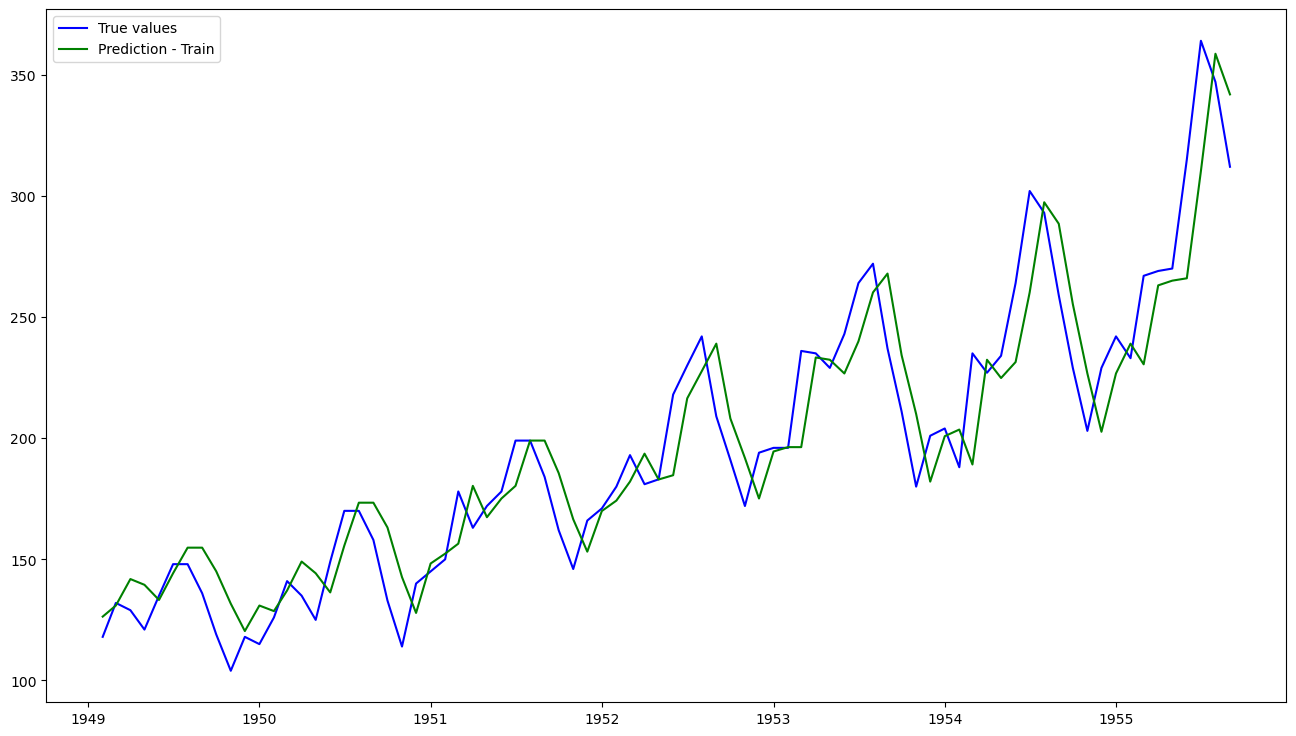

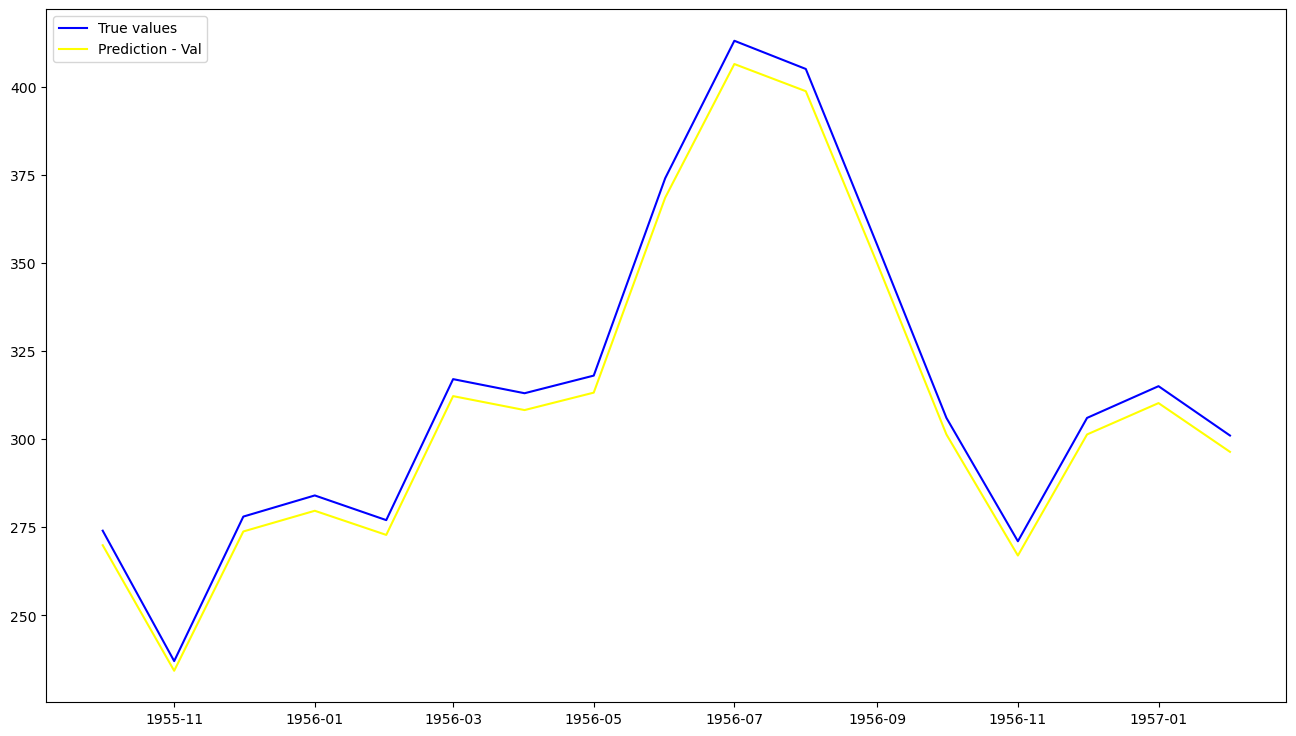

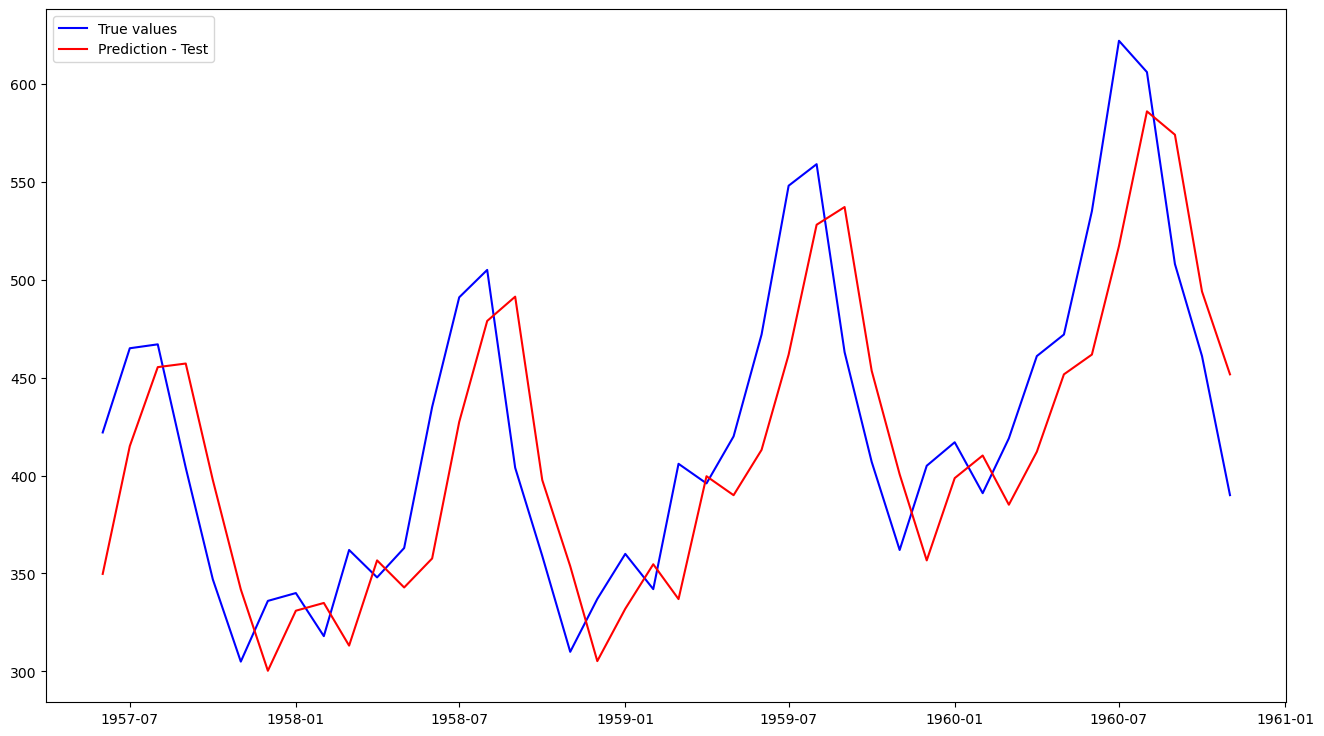

In [14]:
look_back=1
X_train, X_test,  y_train,   y_test = create_dataset(df=np.array(dataset), train_size=train_size, lback=look_back)
X_val=X_train[80+look_back:]
y_val=y_train[80+look_back:]
X_train=X_train[0:80]
y_train=y_train[0:80]
model_gru = Sequential()
model_gru.add(GRU(2, input_shape=(1, look_back)))
model_gru.add(Dense(units=1))
model_gru.compile(loss='mean_squared_error', optimizer='adam')
model_gru.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)
prediction_train = scaler.inverse_transform(model_gru.predict(X_train))
prediction_val = scaler.inverse_transform(model_gru.predict(X_val))
prediction_test = scaler.inverse_transform(model_gru.predict(X_test))
rmse = mean_squared_error(dataset.iloc[80+look_back:len(prediction_train)+len(prediction_val)+look_back], prediction_val) ** 0.5
print(f'RMSE validation: {rmse}')
dataset_new=dataset.copy()
dataset_new=dataset_new['Passengers']
dataset_new_1=dataset_new[1:81]
dataset_new_2=dataset_new[81:98]
dataset_new_3=dataset_new[101:143]
prediction_train = pd.Series(prediction_train.flatten(),
                                index=dataset.index[look_back:len(prediction_train)+look_back])
prediction_val = pd.Series(prediction_val.flatten(),
                                index=dataset.index[81:98])
prediction_test = pd.Series(prediction_test.flatten(),
                                index=dataset.index[101:143])
plt.figure(figsize=(16,9))
plt.plot(dataset_new_1, color='blue', label='True values')
plt.plot(prediction_train, color='green', label='Prediction - Train')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(16,9))
plt.plot(dataset_new_2, color='blue', label='True values')
plt.plot(prediction_val, color='yellow', label='Prediction - Val')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(16,9))
plt.plot(dataset_new_3, color='blue', label='True values')
plt.plot(prediction_test, color='red', label='Prediction - Test')
plt.legend(loc='upper left')
plt.show()

### The trend is well reproduced in all cases. However, the amplitude is generally to small.